In [1]:
!pip install nltk
!pip install functools

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [112 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-3.7
      copying functools.py -> build/lib.linux-x86_64-3.7
      running build_ext
      building '_functools' extension
      creating build/temp.linux-x86_64-3.7
      creating build/temp.linux-x86_64-3.7/src
      gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/include/python3.7m -c src/functools.c -o build/temp.linux-x86_64-3.7/src/functools.o
      src/functools.c: In function ‘init_functools’:
      src/functools.c:43:6: warning: implicit declaration of function ‘Py_InitModule3’ [-Wimplicit-function-declaration]
         43 |  m = Py_InitModule3("_functools", NULL, functools_do

In [2]:
import numpy as np
import pandas as pd
import string
import re
import nltk
!nltk.download('stopwords')
!nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer


#read data
true_file = pd.read_csv("/kaggle/input/fake-news-detection/True.csv")
fake_file = pd.read_csv("/kaggle/input/fake-news-detection/Fake.csv")

/bin/bash: -c: line 0: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 0: `nltk.download('stopwords')'
/bin/bash: -c: line 0: syntax error near unexpected token `'all''
/bin/bash: -c: line 0: `nltk.download('all')'


In [3]:
#some first lines of data
true_file.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_file.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#True_file Data preprocessing
#true_file.info()
true_file.text = true_file.title + true_file.text
fake_file.text = fake_file.title + fake_file.text
true_file.drop(columns = ["title","subject","date"],axis = 1, inplace = True)
fake_file.drop(columns = ["title","subject","date"],axis = 1, inplace = True)
true_file['label'] = 1
fake_file['label'] = 0
frames = [true_file, fake_file]
syn_file = pd.concat(frames,ignore_index=True)
syn_file = syn_file.sample(frac=1).reset_index()
syn_file.drop(columns = ["index"],axis = 1, inplace=True)
syn_file

,text,label
0,TAKE THIS SHORT QUIZ: Which Radical Said It? W...,0
1,Factbox: What is the U.S. Consumer Financial P...,1
2,"Russia, Turkey hope Astana peace talks will le...",1
3,FEDS SPEND BIG BUCKS On Minority-Only Obesity ...,0
4,Republican Carson officially ends White House ...,1
...,...,...
44893,Senate to vote on motion to proceed on tax bil...,1
44894,Vegas Cops Take Cheap Shot At Michael Bennett...,0
44895,WATCH: Mike Pence Went To See ‘Hamilton’ And ...,0
44896,BREAKING DISCOVERY: CLINTON FOUNDATION SHARED ...,0


In [6]:
stop_word_list = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
#Puctuation Removal 
def punctuation_removal(row):
    return row.translate(str.maketrans('', '', string.punctuation))
#Link removal
def link_removal(row):
    return re.sub(r'https?://\S+', '', row)
#Stopword_Removal
def stopword_removal(row):
    return " ".join([word for word in row.split() if word not in stop_word_list])
#Lower case
def lower_case(row):
    return row.lower()
#Stemmer
def stem(row):
    words = word_tokenize(row)
    new_row = reduce(lambda x, y: x + " " + ps.stem(y), words, "")
    return new_row
#Lemmatization
def lemmatization(row):
    row_list = tokenization(row)
    lemma_list = []
    for word in row_list:
        lemmatizer.lemmatize(word)
        lemma_list.append(word)
    new_row = untokenize(lemma_list)
    return new_row

def preprocessing_data(row):
    punc_row = punctuation_removal(row)
    link_row = link_removal(punc_row)
    stop_row = stopword_removal(link_row)
    lower_row = lower_case(stop_row)
    stem_row = stem(lower_row) 
    #final_row = lemmatization(stem_row)
    return stem_row
    
    
    
    

In [7]:
#Preprocessing data in syn_file:
for row in syn_file['text']:
    new_row = preprocessing_data(row)
    syn_file['text'] = syn_file['text'].replace([row], new_row)
syn_file


,text,label
0,take thi short quiz radic said guarant answer...,0
1,factbox what us consum financi protect bureau...,1
2,russia turkey hope astana peac talk lead cong...,1
3,fed spend big buck on minorityonli obes and s...,0
4,republican carson offici end white hous bidwa...,1
...,...,...
44893,senat vote motion proceed tax bill lawmakerwa...,1
44894,vega cop take cheap shot at michael bennett s...,0
44895,watch mike penc went to see ‘ hamilton ’ and ...,0
44896,break discoveri clinton foundat share email s...,0


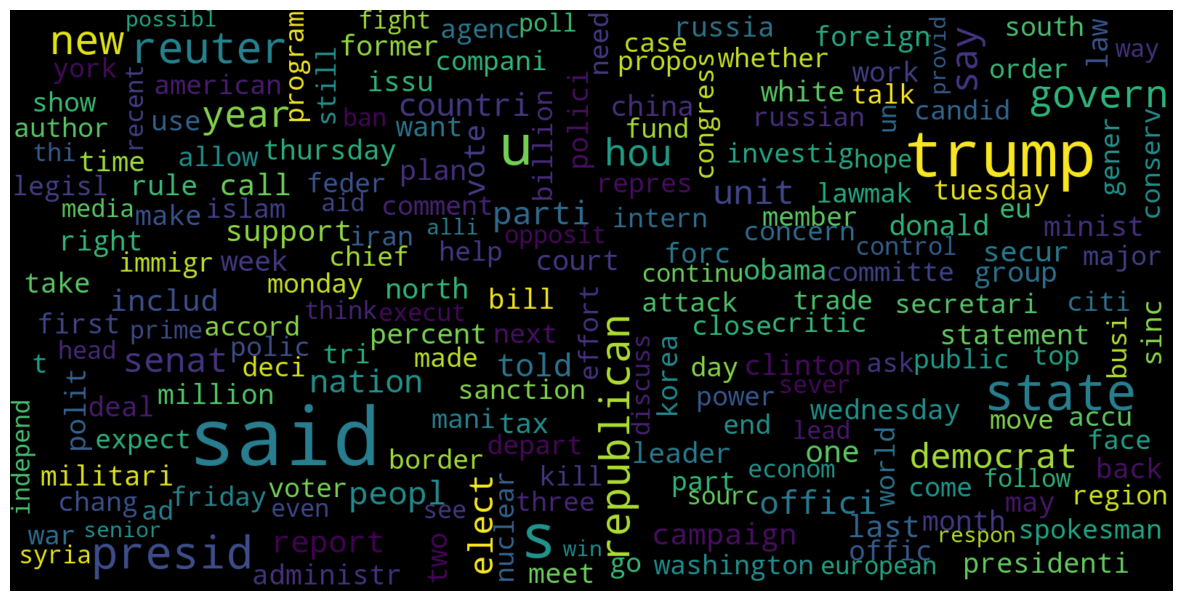

In [8]:
# Real
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(
    word for word in syn_file['text'][syn_file['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

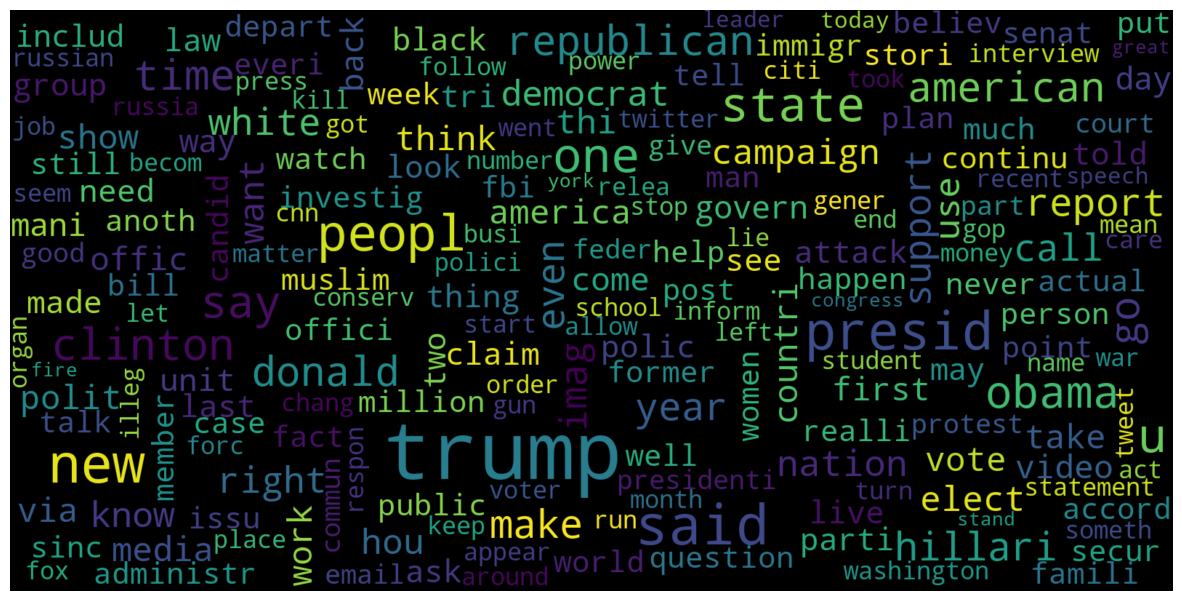

In [9]:
# Fake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(
    word for word in syn_file['text'][syn_file['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(syn_file['text'], 
                                                    syn_file['label'], 
                                                    test_size=0.25)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))


0.9896659242761693


In [17]:
#Save model
import pickle
pickle.dump(model, open('model2.pkl', 'wb'))
pickle.dump(vectorization, open('tfidfvect2.pkl', 'wb'))

In [19]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([row]).toarray()
joblib_model.predict(val_pkl)

array([0])